# Analysis of Missing AQI Values by City

This notebook analyzes the missing AQI values in our dataset, broken down by city.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [4]:
# Read the merged data
df = pd.read_csv('../data/final_merged_data.csv')
print(f"Total number of rows: {len(df)}")
print(f"\nColumns in the dataset:\n{df.columns.tolist()}")

Total number of rows: 50338

Columns in the dataset:
['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations', 'city', 'City_x', 'TropoO3', 'OMIO3', 'StratoO3', 'Date', 'City_y', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [6]:
# Analyze missing AQI values by city
missing_aqi = df[df['AQI'].isna()].groupby('city').size().reset_index()
missing_aqi.columns = ['City', 'Missing_AQI_Count']

# Add total rows per city for context
total_rows = df.groupby('city').size().reset_index()
total_rows.columns = ['City', 'Total_Rows']

# Merge the information
missing_analysis = pd.merge(missing_aqi, total_rows, on='City', how='left')
missing_analysis['Missing_Percentage'] = (missing_analysis['Missing_AQI_Count'] / missing_analysis['Total_Rows'] * 100).round(2)

# Sort by number of missing values
missing_analysis = missing_analysis.sort_values('Missing_AQI_Count', ascending=False)

print("Analysis of Missing AQI Values by City:")
print("\nTop cities with missing AQI values:")
display(missing_analysis)

Analysis of Missing AQI Values by City:

Top cities with missing AQI values:


,City,Missing_AQI_Count,Total_Rows,Missing_Percentage
10,ernakulam,1856,2009,92.38
16,kochi,1851,2009,92.14
21,shillong,1804,2009,89.80
4,bhopal,1731,2009,86.16
6,chandigarh,1710,2009,85.12
8,coimbatore,1665,2009,82.88
12,guwahati,1514,2009,75.36
22,talcher,1311,2009,65.26
5,brajrajnagar,1296,2009,64.51
17,kolkata,1255,2009,62.47


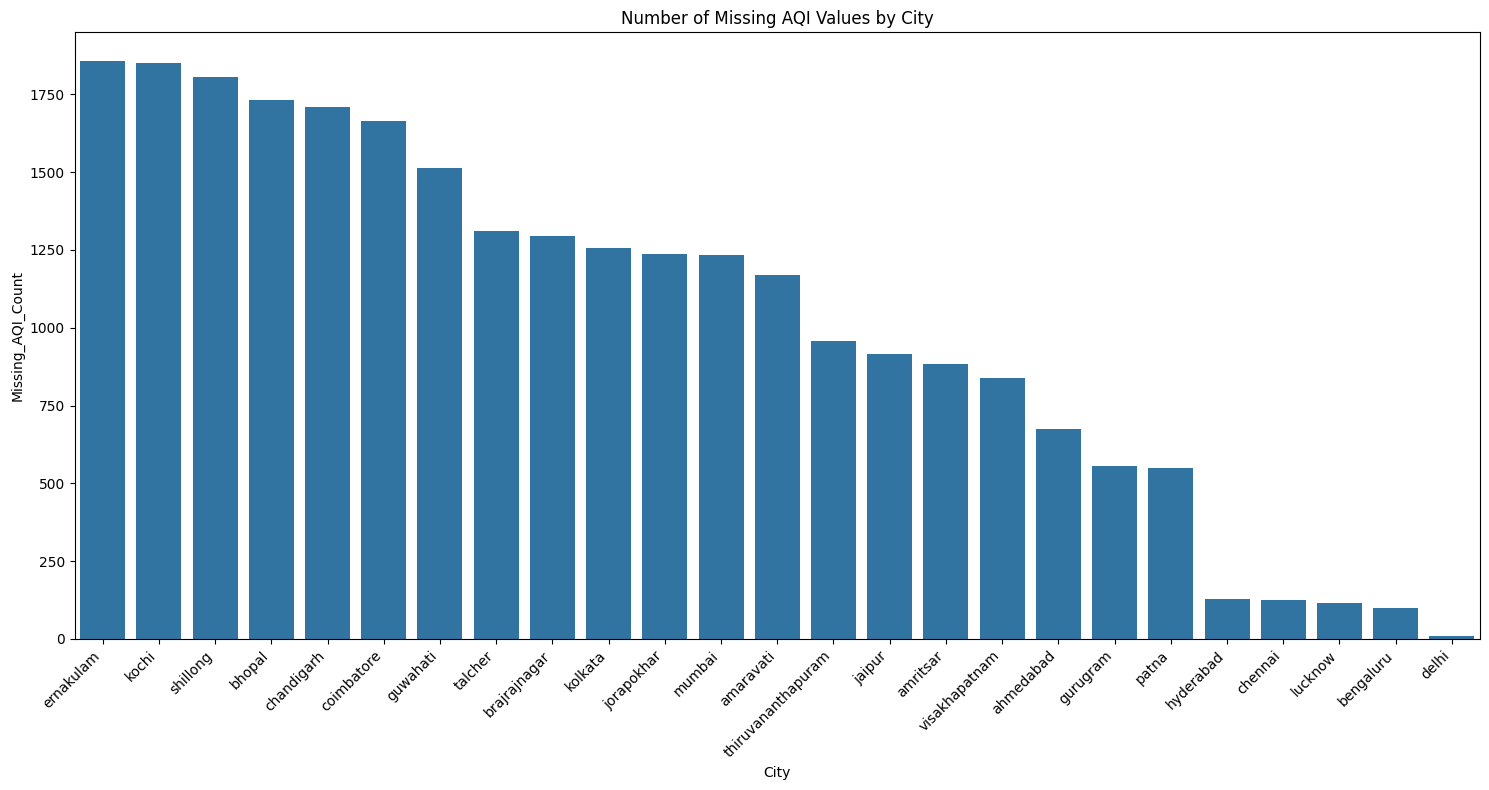

In [7]:
# Create a bar plot of missing AQI counts by city
plt.figure(figsize=(15, 8))
sns.barplot(data=missing_analysis, x='City', y='Missing_AQI_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Missing AQI Values by City')
plt.tight_layout()
plt.show()

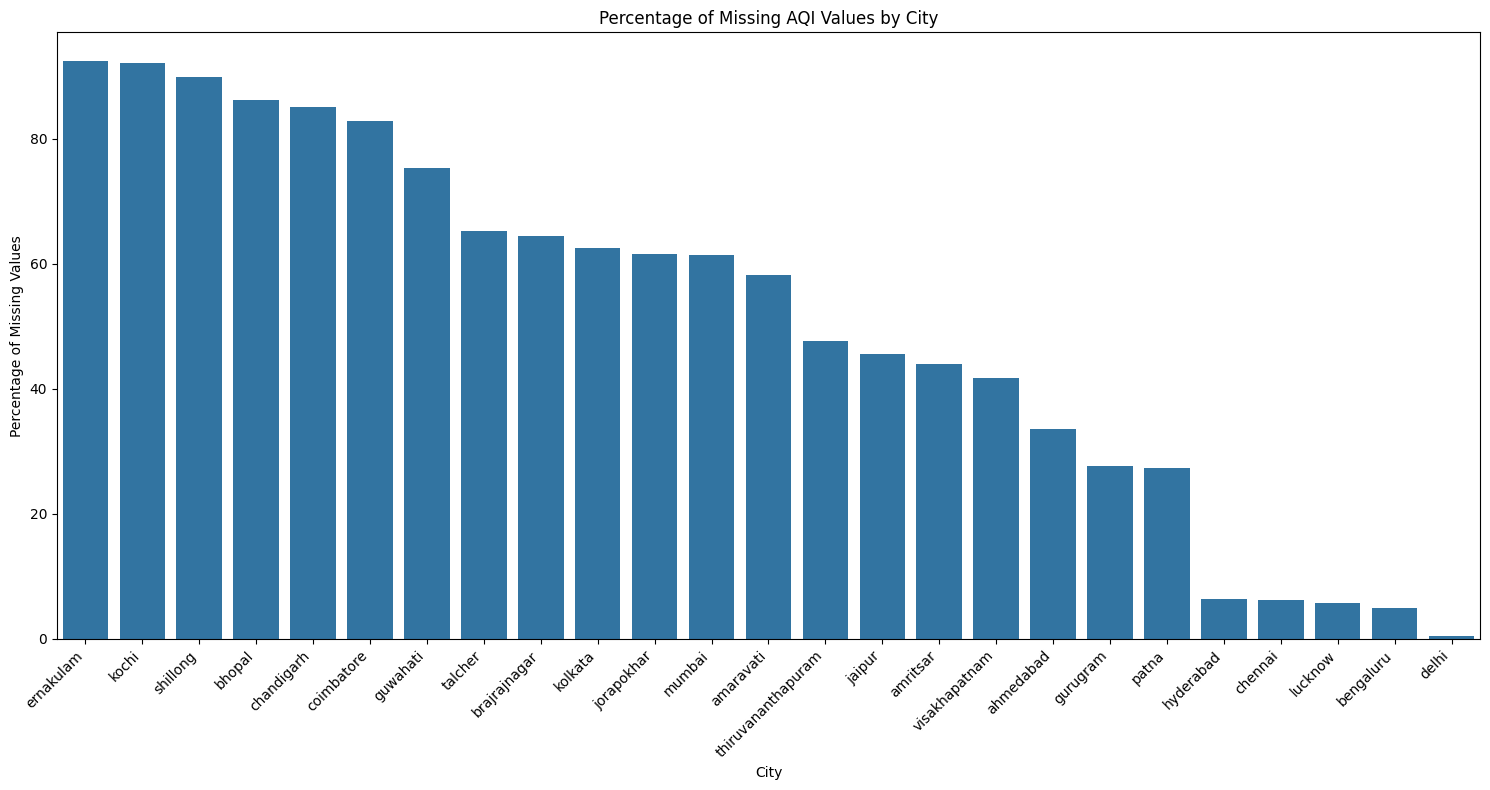

In [8]:
# Create a bar plot of missing AQI percentages by city
plt.figure(figsize=(15, 8))
sns.barplot(data=missing_analysis, x='City', y='Missing_Percentage')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing AQI Values by City')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

## Summary Statistics

Below we'll calculate some summary statistics about the missing AQI values:

In [9]:
# Calculate summary statistics
total_missing = missing_analysis['Missing_AQI_Count'].sum()
total_rows = missing_analysis['Total_Rows'].sum()
overall_missing_percentage = (total_missing / total_rows * 100).round(2)

print(f"Total number of rows across all cities: {total_rows:,}")
print(f"Total number of missing AQI values: {total_missing:,}")
print(f"Overall percentage of missing AQI values: {overall_missing_percentage}%")
print(f"\nNumber of cities with missing AQI values: {len(missing_analysis)}")

# Display summary statistics of missing percentages
print("\nSummary statistics of missing percentages across cities:")
display(missing_analysis['Missing_Percentage'].describe().round(2))

Total number of rows across all cities: 50,225
Total number of missing AQI values: 25,486
Overall percentage of missing AQI values: 50.74%

Number of cities with missing AQI values: 25

Summary statistics of missing percentages across cities:


count    25.00
mean     50.74
std      30.28
min       0.50
25%      27.68
50%      58.14
75%      75.36
max      92.38
Name: Missing_Percentage, dtype: float64